In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
print(data.head())

   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


### Scientific Background:

The choice of fertilizer is influenced by several key factors, including:

- **Soil Nutrient Deficiency:** The specific nutrients that are lacking in the soil determine the type of fertilizer needed. Soil tests can identify deficiencies in nitrogen (N), phosphorus (P), potassium (K), and other micronutrients.

- **Crop Requirements:** Different crops have varying nutrient needs. For instance, leafy vegetables typically require more nitrogen, while root crops may need more phosphorus.

- Due to our small dataset, we will focus on predicting the type of fertilizer based on the _nutrient content of the soil_. We will use a machine learning model to predict the type of fertilizer based on the nutrient content of the soil.


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None


In [9]:
data.rename(columns={'Humidity': 'humidity', 'Soil Type': 'soil_type', 'Crop Type': 'crop_type', 'Fertilizer Name': 'fertilizer'}, inplace=True)

In [10]:
data.describe(include='all')

,Temparature,Humidity,Moisture,soil_type,crop_type,Nitrogen,Potassium,Phosphorous,fertilizer
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


In [19]:
# visualization

from matplotlib import pyplot as plt
import seaborn as sns

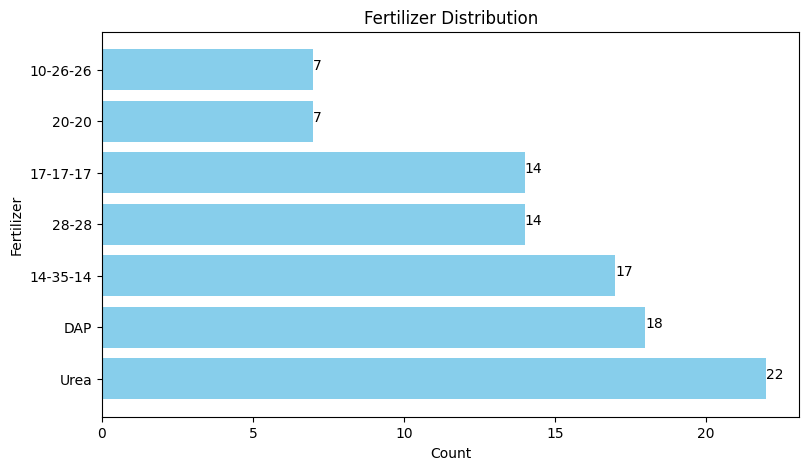

In [22]:
labels = data['fertilizer'].unique()
counts = list(data['fertilizer'].value_counts())

plt.figure(figsize=(9, 5))
plt.barh(labels, counts, color='skyblue')

for index, value in enumerate(counts):
    plt.text(value, index, str(value))
plt.xlabel('Count')
plt.ylabel('Fertilizer')
plt.title('Fertilizer Distribution')
plt.show()

In [25]:
# from kaggle, for plotting discreet and continuous variables

def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.fertilizer, ax=axes[1])

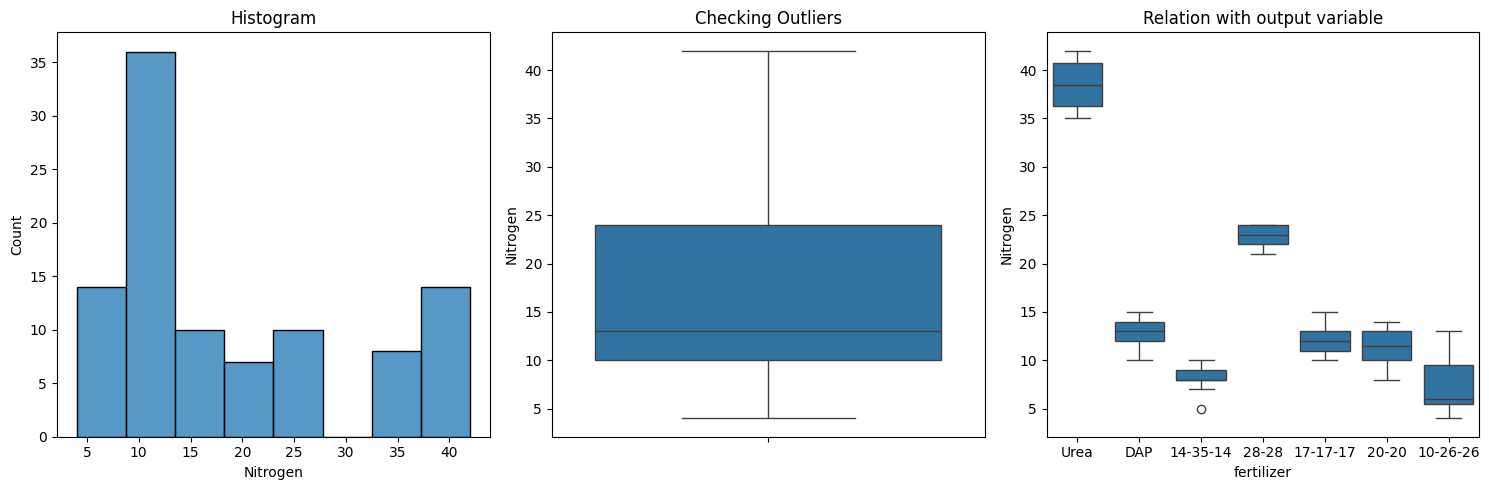

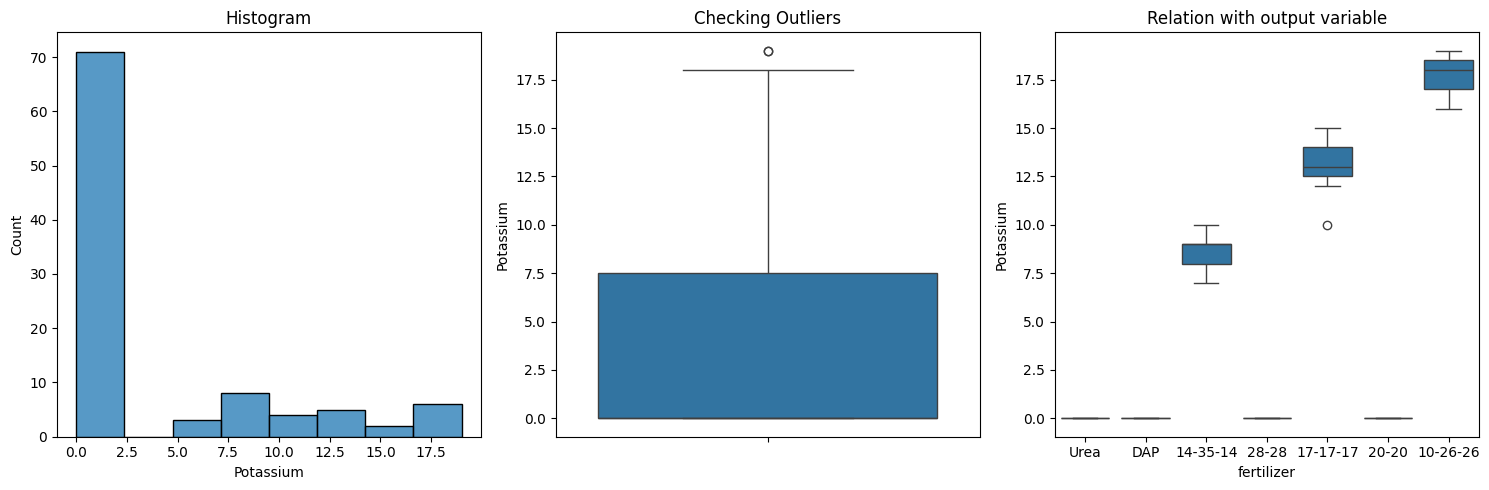

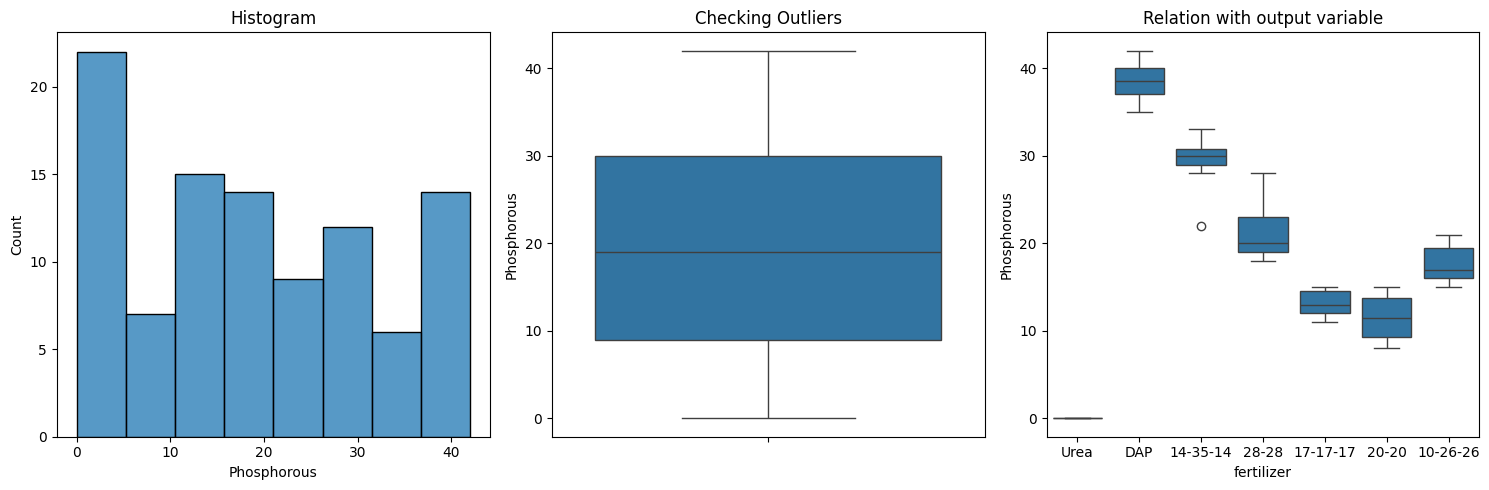

In [27]:
plot_conti(data.Nitrogen)
plot_conti(data.Potassium)
plot_conti(data.Phosphorous)

## Model Building:


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [29]:
# Select only the relevant features
features = ['Nitrogen', 'Phosphorous', 'Potassium']
target = 'fertilizer'

X = data[features]
y = data[target]


In [30]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [32]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [33]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    results[model_name] = {'accuracy': accuracy, 'report': report}
    print(f'{model_name}:\n Accuracy: {accuracy}\n')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

c:\Users\Abdulmunim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
 Accuracy: 0.95

              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.93      0.95      0.92        20
weighted avg       0.97      0.95      0.95        20

K-Nearest Neighbors:
 Accuracy: 0.95

              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
  

In [34]:
summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for model_name, result in results.items():
    summary['Model'].append(model_name)
    summary['Accuracy'].append(result['accuracy'])
    summary['Precision'].append(result['report']['weighted avg']['precision'])
    summary['Recall'].append(result['report']['weighted avg']['recall'])
    summary['F1-Score'].append(result['report']['weighted avg']['f1-score'])

summary_df = pd.DataFrame(summary)
print(summary_df)

                    Model  Accuracy  Precision  Recall  F1-Score
0     Logistic Regression      0.95   0.975000    0.95  0.953333
1     K-Nearest Neighbors      0.95   0.975000    0.95  0.953333
2           Decision Tree      0.90   0.966667    0.90  0.916429
3           Random Forest      1.00   1.000000    1.00  1.000000
4  Support Vector Machine      0.90   0.966667    0.90  0.900000
5       Gradient Boosting      0.90   0.933333    0.90  0.901429


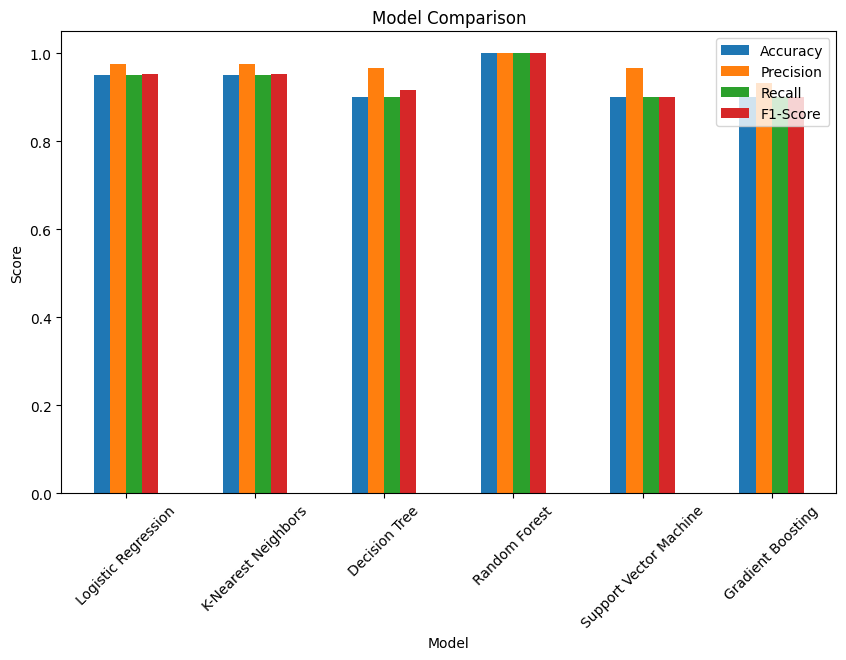

In [35]:
# Plotting the comparison
import matplotlib.pyplot as plt

summary_df.set_index('Model', inplace=True)
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [36]:
# TODO: Add More Data and Features (Munim)

In [37]:
# Save the Random Forest model
import joblib

model = models['Random Forest']
joblib.dump(model, 'model.pkl')
print('Model saved to model.pkl')


Model saved to model.pkl


In [38]:
# extract the mappings from the label encoder
class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(class_mapping)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [39]:
# sample function to load the model from file and use it anywhere

def predict_fertilizer(nitrogen, phosphorous, potassium):
    model = joblib.load('model.pkl')
    classes = {0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}
    X = [[nitrogen, phosphorous, potassium]]
    prediction = model.predict(X)
    return classes[prediction[0]]

In [40]:
predict_fertilizer(10, 20, 30)

c:\Users\Abdulmunim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'10-26-26'